In [1]:
import pandas as pd
import scipy

data_filename = "meteo_lt.dat"
col_names = ["date", "wms_status", "rain_flag", "moisture_flag", "truss_temp", "oil_temp", "wind_speed", "wind_direction", "ambient_temp", "dew_point", "humidity", "air_pressure", "light"]

In [2]:
df1 = pd.read_csv(data_filename, sep=" ", names = col_names, parse_dates=[0], date_format="%Y-%m-%d%H:%M:%SUTC")

In [3]:
df1

,date,wms_status,rain_flag,moisture_flag,truss_temp,oil_temp,wind_speed,wind_direction,ambient_temp,dew_point,humidity,air_pressure,light
0,2022-01-01 00:02:02,OKAY,CLEAR,0.05,8.63,9.5,5.1,188.0,8.9,-12.70,0.20,778.0,1.2
1,2022-01-01 00:03:59,OKAY,CLEAR,0.05,8.65,9.1,4.4,184.0,9.0,-13.30,0.19,778.0,1.5
2,2022-01-01 00:05:55,OKAY,CLEAR,0.05,8.72,9.5,3.8,217.0,9.1,-13.70,0.18,778.0,1.4
3,2022-01-01 00:08:02,OKAY,CLEAR,0.05,8.79,9.5,3.3,197.0,9.2,-13.20,0.19,778.0,1.6
4,2022-01-01 00:09:58,OKAY,CLEAR,0.05,8.84,9.3,3.4,192.0,9.4,-13.30,0.19,778.0,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
503105,2024-04-30 13:47:57,WARN,CLEAR,0.00,0.00,11.8,4.2,52.0,10.2,-7.53,0.28,775.0,798.0
503106,2024-04-30 13:50:02,WARN,CLEAR,0.00,0.00,12.0,1.4,21.0,10.4,-8.17,0.26,775.0,798.0
503107,2024-04-30 13:51:59,WARN,CLEAR,0.00,0.00,11.8,3.5,75.0,10.5,-8.33,0.26,775.0,798.0
503108,2024-04-30 13:53:54,WARN,CLEAR,0.00,0.00,11.8,4.7,49.0,10.5,-6.33,0.30,775.0,798.0


<AxesSubplot: ylabel='Density'>

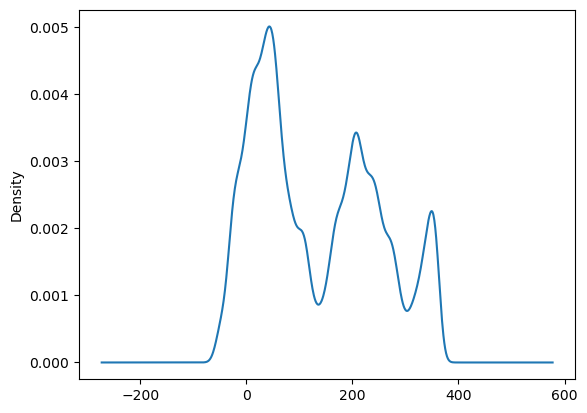

In [5]:
df1["wind_direction"].plot.kde()

In [8]:
kde = scipy.stats.gaussian_kde(df1["wind_direction"])

In [11]:
import matplotlib.pyplot as plt
import numpy as np


theta = np.arange(0, 360, 1)

r = kde(theta)


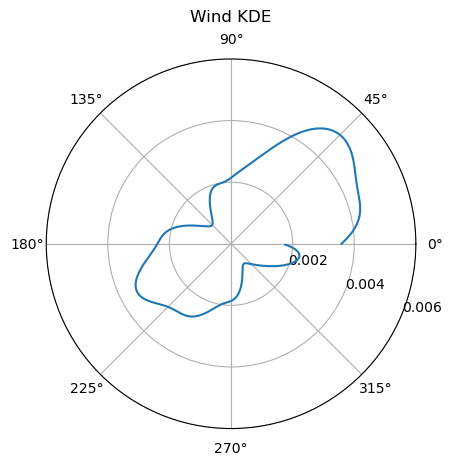

In [20]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta/360*2*np.pi, r)
ax.set_rmax(0.006)
ax.set_rticks([0.002, 0.004, 0.006])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

ax.set_title("Wind KDE", va='bottom')
plt.show()

https://gist.github.com/jobovy/a10a97353b8200b397de1f35a6525ece